<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06



<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [2]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



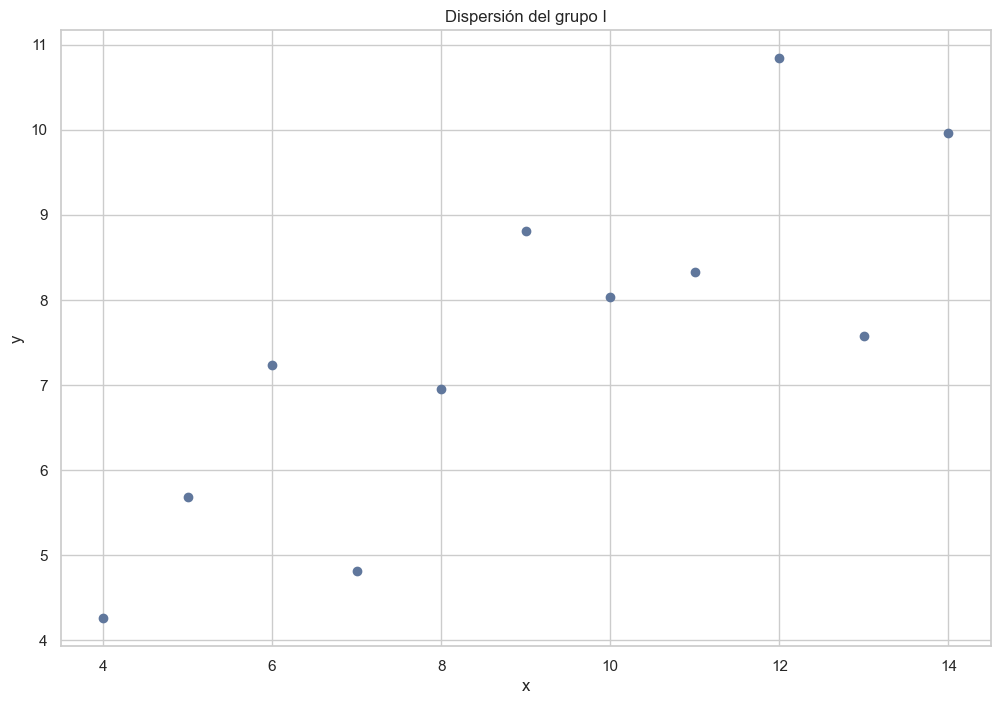

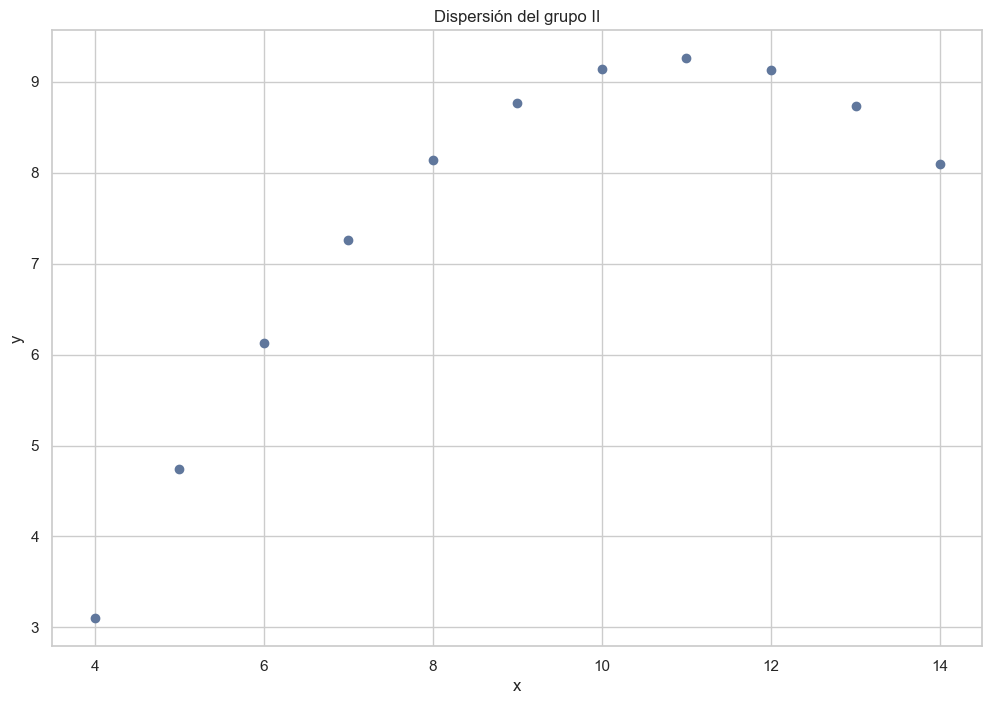

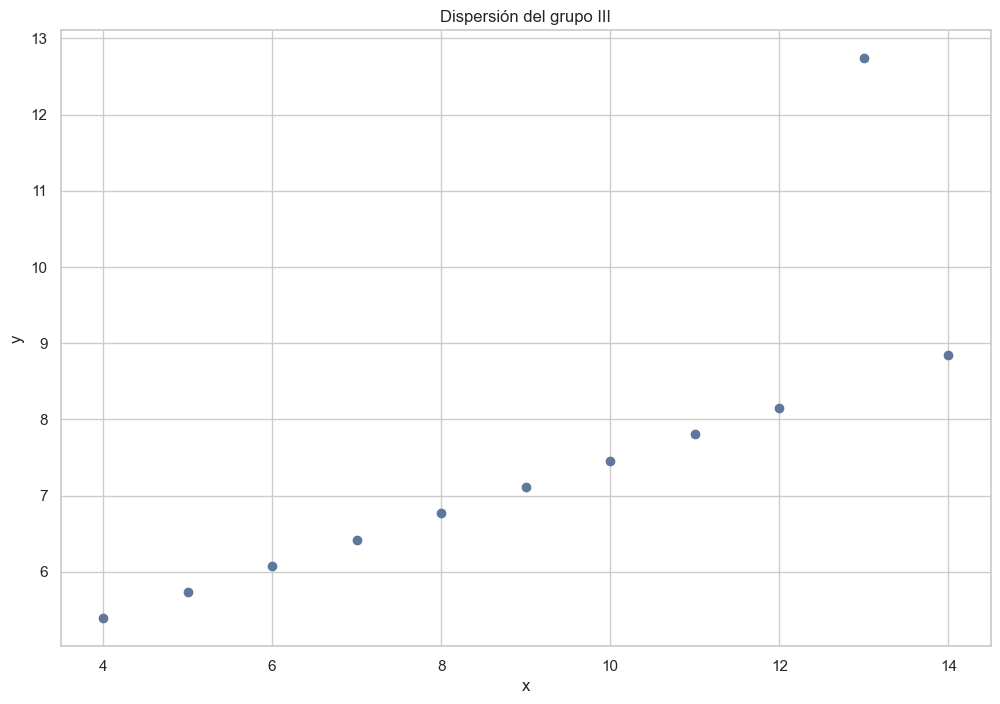

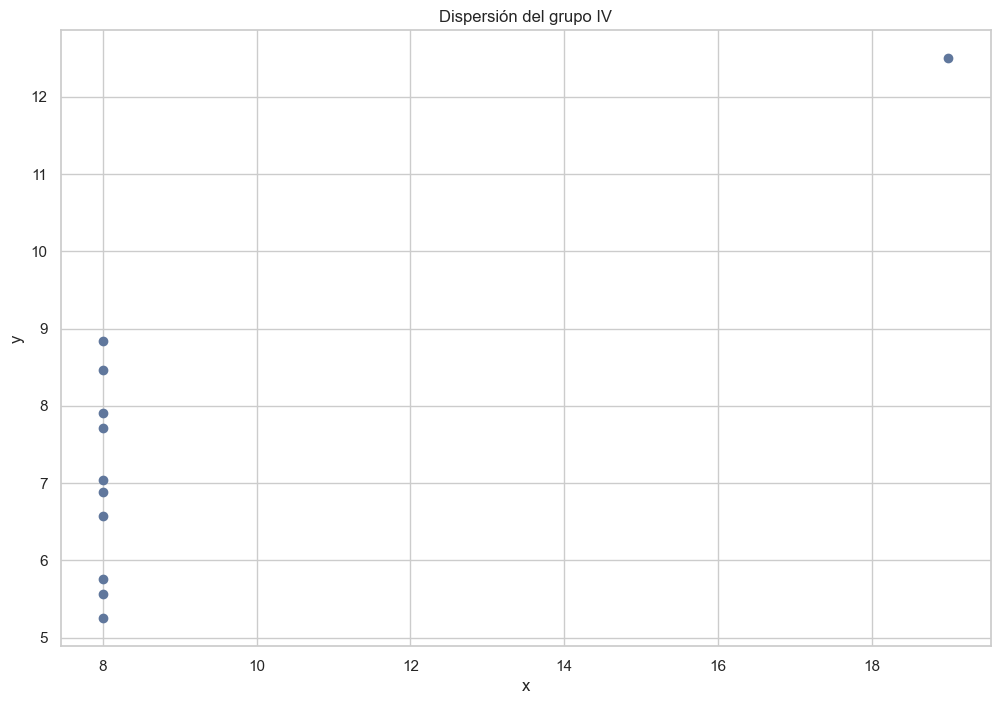

In [3]:
# FIXME
data_dicc = {}
for i in data['dataset'].unique().tolist():
    data_dicc[i] = data.loc[data['dataset']==i,['x','y']]
for i in data['dataset'].unique().tolist():
    plt.scatter(data_dicc[i]['x'],data_dicc[i]['y'])
    plt.title(f'Dispersión del grupo {i}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


El conjunto I se ve como una función lineal con bastante ruido, el conjunto II se parece a una parabola invertida, el conjunto III se  ve como una función bastante lineal excepto en el último dato, y el conjunto IV es solo una linea recta vertical, casi como si fuera un experimento muy dificil de replicar.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [4]:
# FIXME
data_dicc['I'].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [5]:
data_dicc['II'].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [6]:
data_dicc['III'].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [7]:
data_dicc['IV'].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Como se indicó en el enunciado,  todos los conjuntos tiene la misma media y  desviación estandar,  sin embargo varían sus máximos, mínimos y cuartiles. Utilizando estas diferencias podremos analizar alrededor de que valores se concentran más los datos. Por ejemplo,

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



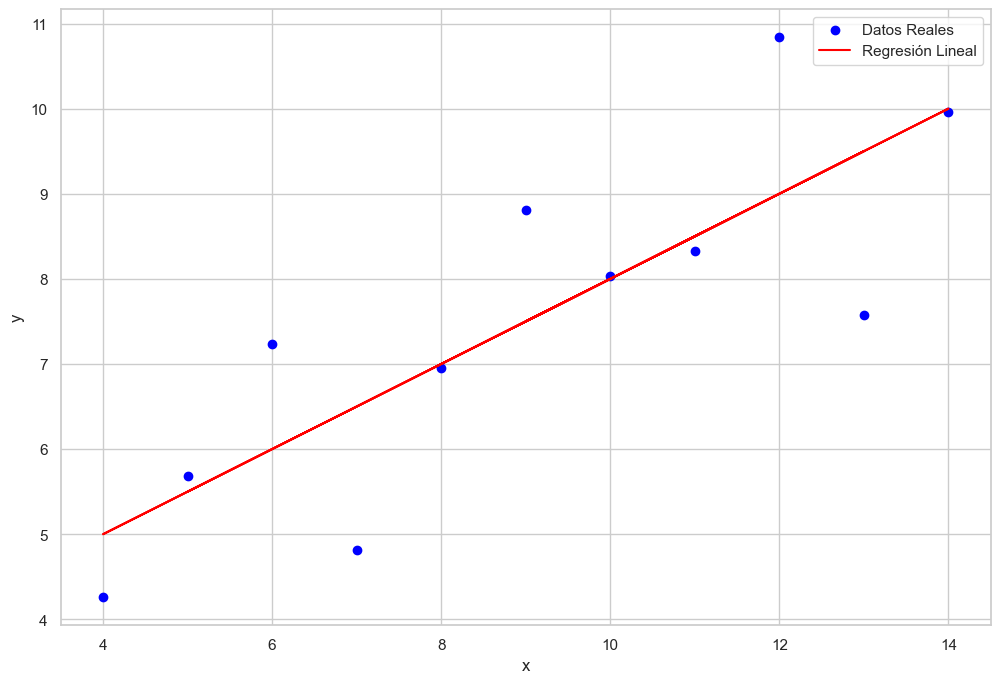

R cuadrado: 0.6665424595087748
MSE: 1.2511536363636366



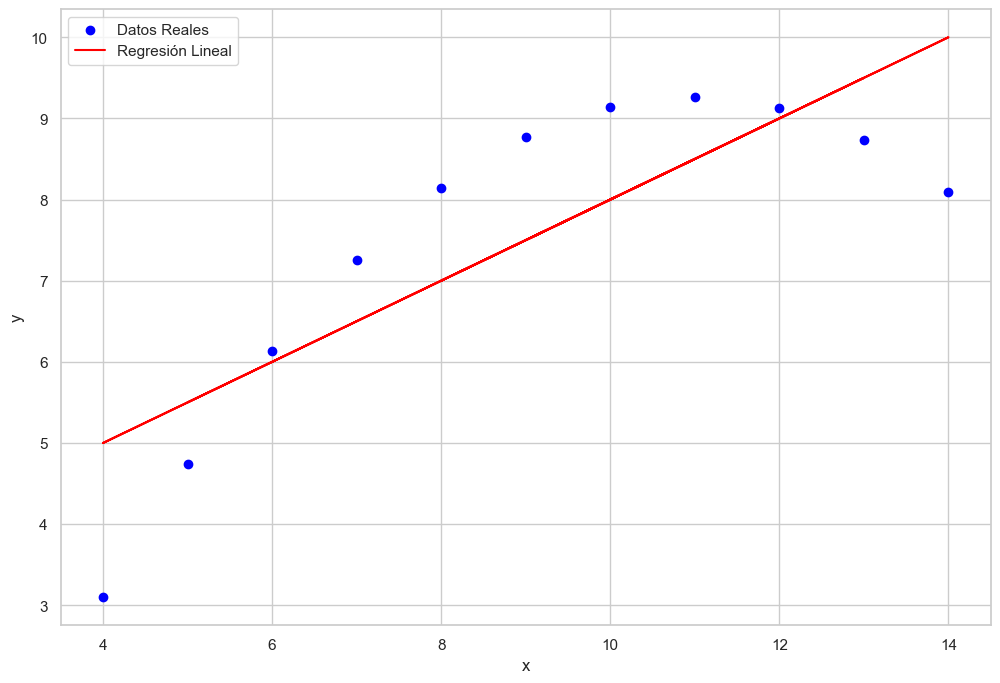

R cuadrado: 0.6662420337274844
MSE: 1.2523900826446281



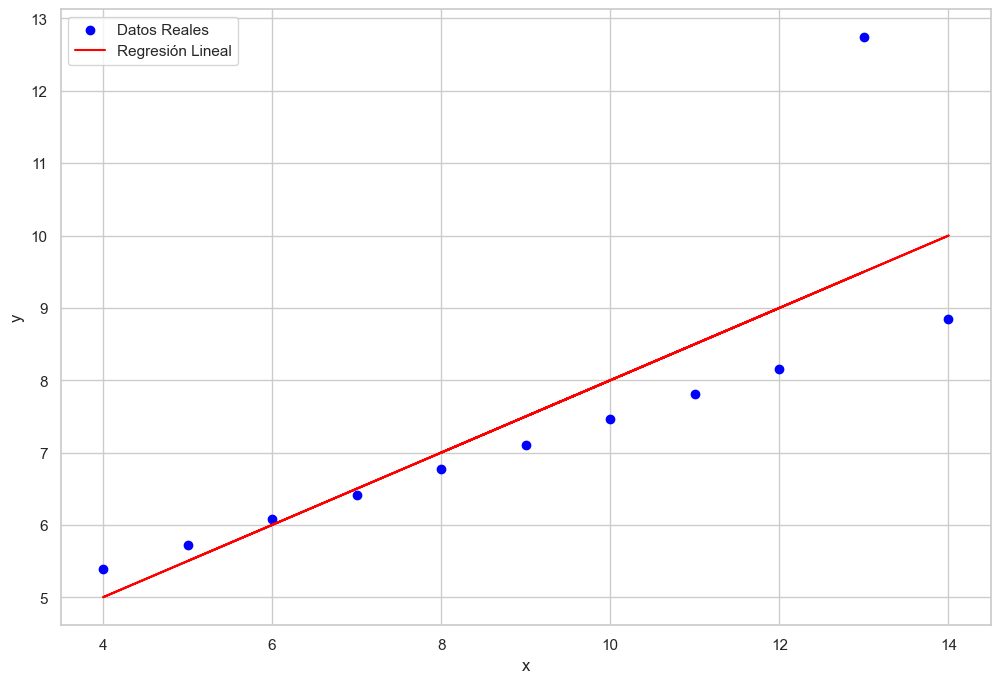

R cuadrado: 0.6663240410665592
MSE: 1.2505628925619836



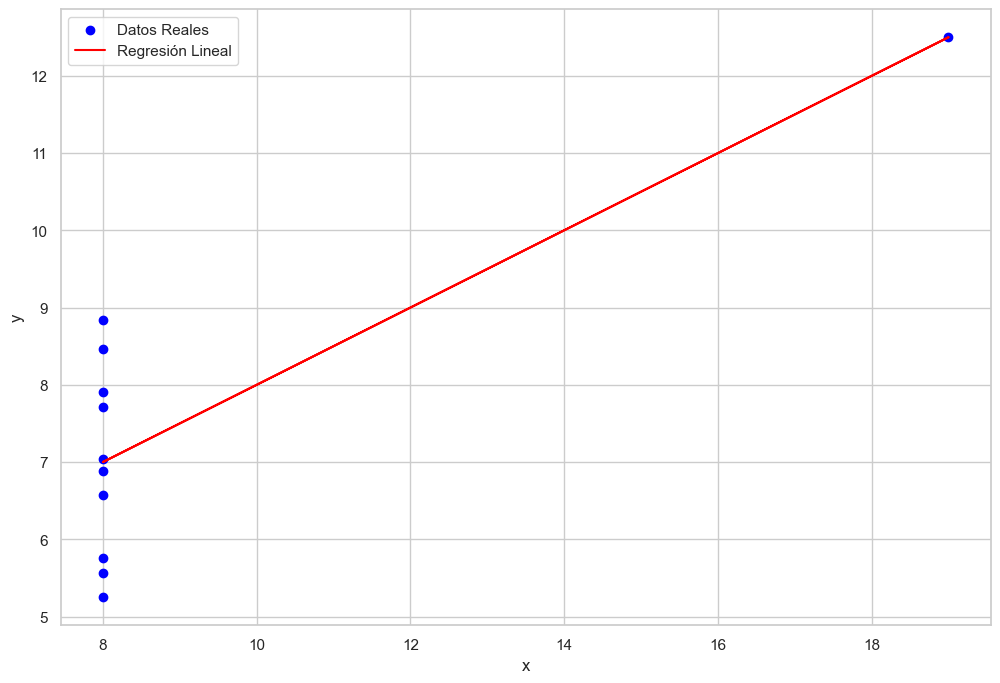

R cuadrado: 0.6667072568984653
MSE: 1.249317272727273



In [15]:
# FIXME
from sklearn.model_selection import train_test_split

for i in data['dataset'].unique().tolist():
    X = data_dicc[i][['x']]
    y = data_dicc[i]['y']
    LR = LinearRegression()
    LR.fit(X,y)
    xfit = X.copy()
    yfit = LR.predict(xfit)
    mse = mean_squared_error(y,yfit)
    R2  = r2_score(y,yfit)
    plt.scatter(X, y, label= 'Datos Reales', color='blue')
    plt.plot(xfit,yfit,label='Regresión Lineal',color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    print(f'R cuadrado: {R2}\nMSE: {mse}\n')

Primero notemos que para cada grupo tenemos pocos datos, lo quqe hace que nuestros modelos sean poco precisos. Además de eso, si bien la regresión lineal funciona bien con el primer conjunto de datos (Ya que es una progresión lineal con ruido) claramente en conjunto que se comporta como una parabola y en el conjunto donde es una recta vertical no se adapta bien, ya que las parabolas no tienen comportamientos lineales, y la vertical nisiquiera se puede escribir como una función. Con todo eso tomado en cuenta, los indicadores eestadisticos nos muestran resultados casi identicos en todos los conjuntos de datos. Esto probablemente se deba a que estos se calculan usando metodos que involucran la media, la desviación estandar  y otros estadisticos que, por diseño, son iguales entre si,  o muy parecidos.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

La primera estrategia sería conseguir más datos, pero por ahora trataremos de trabajar con los datos que tenemos. Para el dataset I no hay problemas con usar una regresión lineal, así la mantendremos así.

Para el dataset II, con observar el gráfico podemos intuir que se podría tratar de una función cuadrática, así que lo cambiaremos el modelo.

Para el dataset III tenemos un dato que está completamente fuera del rando de lo esperado, por lo que lo trataremos como si fuera un "outlier" y lo eliminaremos para continuar usando un ajuste lineal.

Finalmente el Dataset IV es un dataset extraño si se observa tal cual está. Primero podemos ver que  tiene  un dato aparentemente "outlier", ya que todo el resto está amontonado sobre x = 8. El problema con esta teoría  es que al leer los datos así nos encontramos con que la información no tiene sentido, puesto que en teoriía "x" es la variable independiente del experimento,por lo que podriamos pensar un par de cosas:

    (i) La información fue mal obtenida, es decir, "x" es  la variable dependiente e "y" es la independiente, teniendo así  una función  que se espera sea constante.

    (ii) Estamos enfrentandonos a un experimento  con más de una variable independiente, por lo que nuestro analisis es incompleto y nuestro modelo no nos  dice nada.

    (iii) El experimento de donde se sacaron estos datos es muy dificil  de replicar, lo que hace que  formular un modelo acertado sea una tarea monumentalmente complicada.
    
Trataré el caso (i). Para arreglar este  problema basta con invertir las variables y eliminar el dato "outlier", quedandonos así una función constante.

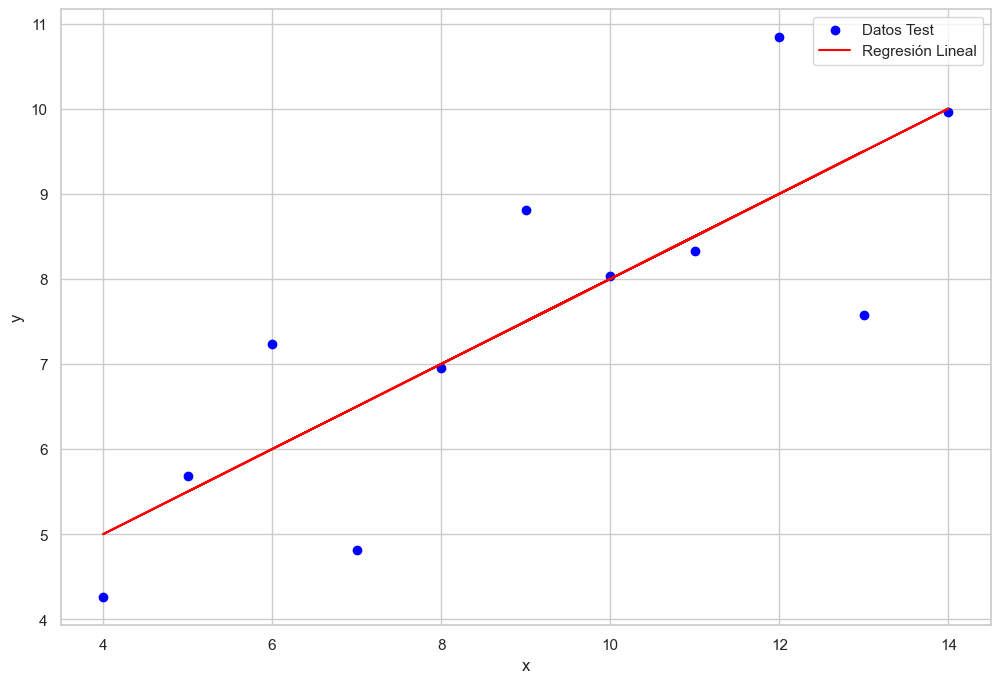

R cuadrado: 0.6665424595087748
MSE: 1.2511536363636366



In [16]:
#Mantener la regresion lineal  del caso I
X = data_dicc['I'][['x']]
y = data_dicc['I']['y']
LR = LinearRegression()
LR.fit(X,y)
xfit = X.copy()
yfit = LR.predict(xfit)
mse = mean_squared_error(y,yfit)
R2  = r2_score(y,yfit)
plt.scatter(X, y, label= 'Datos Test', color='blue')
plt.plot(xfit,yfit,label='Regresión Lineal',color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'R cuadrado: {R2}\nMSE: {mse}\n')





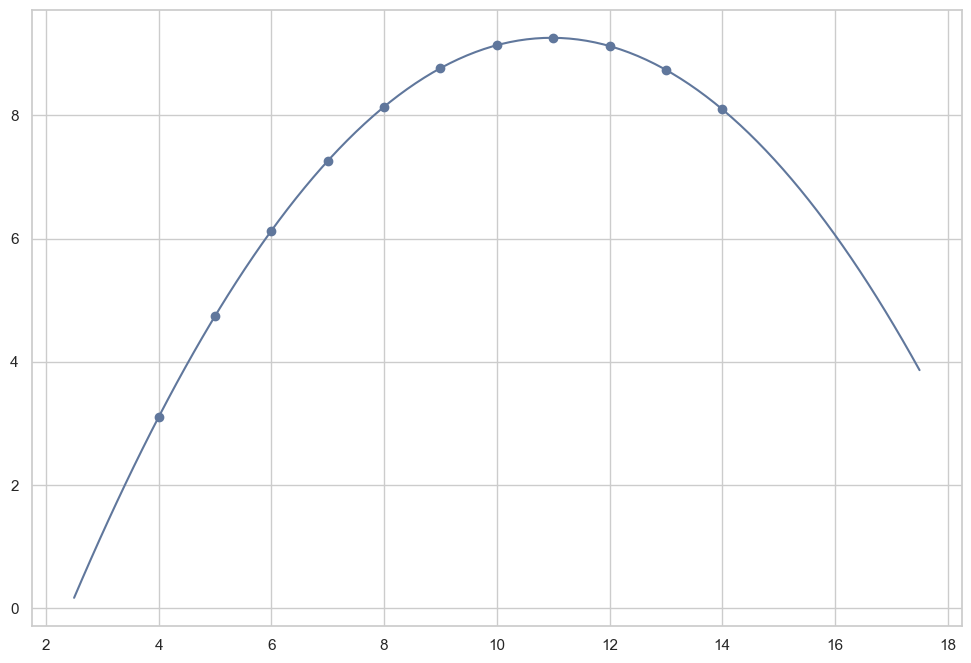

MSE: 0.31710740951360333


In [19]:
#Cambiar a un modelo cuadrático
from sklearn.preprocessing import PolynomialFeatures
poly =  PolynomialFeatures(degree=4,include_bias=False)
dataII = data_dicc['II']
x = dataII['x'].values
y = dataII['y'].values
model = np.poly1d(np.polyfit(x,y,2))
polyline = np.linspace(2.5,17.5,100)
mse = mean_squared_error(y,model(y))
plt.scatter(x,y)
plt.plot(polyline,model(polyline))
plt.show()
print(f'MSE: {mse}')

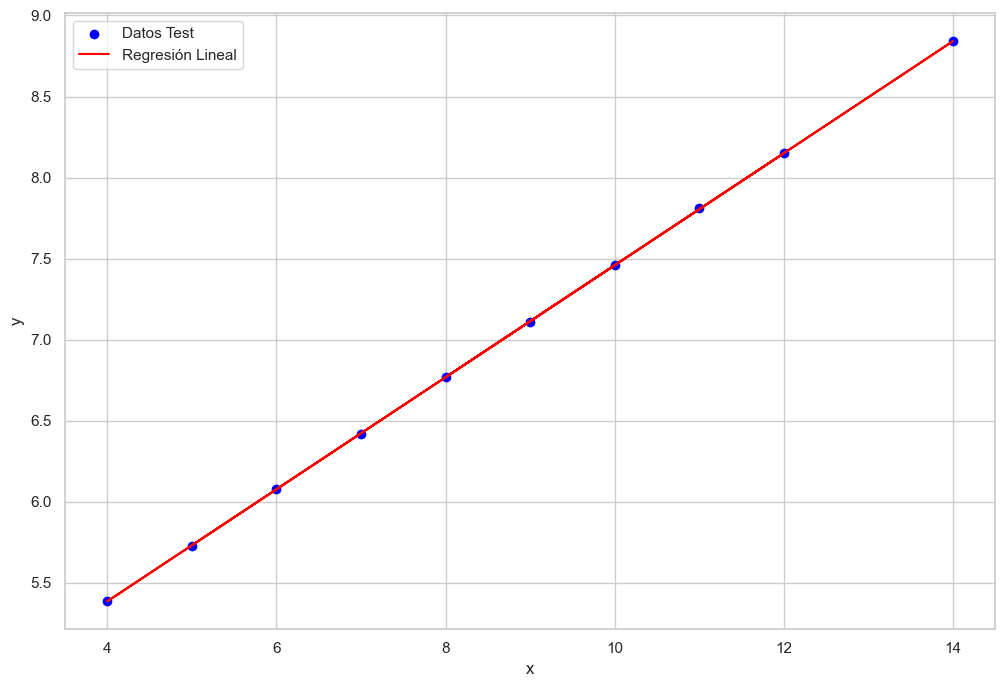

R cuadrado: 0.999993107581533
MSE: 7.597402597401847e-06



In [27]:
#Quitar el dato outlier
dataIII = data_dicc['III']
dataIII = dataIII.loc[dataIII['x']!=13,:]
#Mantener Regresion Lineal
x = dataIII[['x']]
y = dataIII['y']
LR = LinearRegression()
LR.fit(x,y)
xfit = x.copy()
yfit = LR.predict(xfit)
mse = mean_squared_error(y,yfit)
R2  = r2_score(y,yfit)
plt.scatter(x, y, label= 'Datos Test', color='blue')
plt.plot(xfit,yfit,label='Regresión Lineal',color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'R cuadrado: {R2}\nMSE: {mse}\n')



Ahora si es bastante preciso.

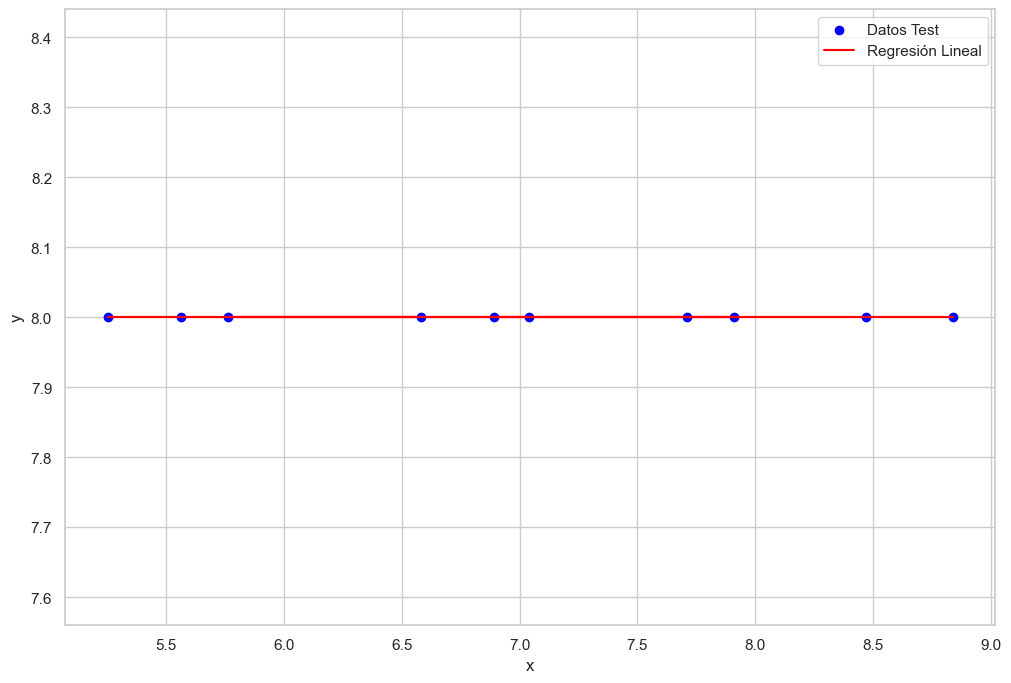

R cuadrado: 1.0
MSE: 0.0



In [29]:
#Quitar el outlier y luego dar vuelta los datos
dataIV = data_dicc['IV']
dataIV = dataIV.loc[dataIV['x']==8]
x=dataIV[['y']]
y=dataIV['x']
#Regresion Linear
LR = LinearRegression()
LR.fit(x,y)
xfit = x.copy()
yfit = LR.predict(xfit)
mse = mean_squared_error(y,yfit)
R2  = r2_score(y,yfit)
plt.scatter(x, y, label= 'Datos Test', color='blue')
plt.plot(xfit,yfit,label='Regresión Lineal',color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'R cuadrado: {R2}\nMSE: {mse}\n')



Y efectivamente es una constante.